# Scottish Referendum Prediction after Brexit situation
Anna Littel – 4308018, Deniz Kalender – 4626265, Gerry Faturrochman – 4520270


## Introduction

The morning after the vote for Brexit, First Minister Nicola Sturgeon said it was "highly likely" that Scotland would lead to the break-up of the UK (The Week, 2016).

The article states that, after the Brexit, there will be a big enough shift in Scotlands voters, from staying to leaving UK, that the vote for an Independent Scotland actually seems plausible. There seemed to be a correlation between those voting to stay in the EU and those voting to leave the UK. If so, can this be explored out using data analysis with python? And can these results be used to predict the possible upcoming Scotland Independence Vote?

In this notebook we want to investigate the following questions:

-	Is there a correlation between the Scottish voters staying at EU and leaving the UK? If there is, is this correlation enough for a shift in Scottish voters from staying to leaving UK? 

-	What is the relation between voters district and voters age group to the votes they cast?

-	In this concluding question we want to predict the outcome of the “Next Scottish Independence Referendum Elections” by investigating the result from two previous elections. (Scottish Independence Referendum and BREXIT)



# I. Referenda results

The first thing that needs to be done before looking at the analysis is to prepare the data that will be used. This chapter will look at the results from the two referenda.

In [1]:
# -*- coding: utf-8 -*-
#Import Libraries used in the Analysis
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import scipy.stats as st
import matplotlib.mlab as mlab
from lxml import html
import requests
from __future__ import division
import bs4 as bs
import urllib
import unicodedata
import csv
from collections import defaultdict
from scipy.stats import linregress

## Scottish Independence Referendum Result 
The result of Scotish Independence Referendum shown that most of the Areas in Scotland voted to remain in UK. The result is presented here as of September 24th 2014 09:46:20.

In [2]:
# Fetching data from official website
x = urllib.urlopen('http://scotlandreferendum.info/?scotref_result=results').read() # no need to use urllib.request in python 2.7

soup = bs.BeautifulSoup(x,'lxml')
#soup = bs.BeautifulSoup(x,'html.parser')
print(soup.title.string)

table = soup.find_all('tr')

row_list = []
for tr in table:
    #th = tr.find_all('th') # type of the headers in html
    td = tr.find_all('td')
    row = [i.text for i in td]
    normalized_data = []
    for item in row:
        normalized = unicodedata.normalize('NFKD', item).encode('ascii','ignore')
        normalized_data.append(normalized)
    #print normalized_data      
    row_list.append(normalized_data)

row_list
#print row_list

# set the header
keys= ['Area','Total Votes Counted', 'Leave','Remain','Rejected Papers'] 

# get the desirable data
df_scot_referendum = pd.DataFrame(row_list[42:74],columns = keys)
df_scot_referendum.sort_values('Area',inplace=True,ascending=True)
df_scot_ref = df_scot_referendum.reset_index(drop=True)
# get rid unwanted comma between the number, and convet the number from string into float
for column in df_scot_ref:
    df_scot_ref[column] = df_scot_ref[column].str.replace(',','')
    try:
        df_scot_ref[column].astype('float64')
    except:
        pass
df_scot_ref.head()

Scotland's Independence Referendum | Results


,Area,Total Votes Counted,Leave,Remain,Rejected Papers
0,Aberdeen City,143664,59390,84094,180
1,Aberdeenshire,180045,71337,108606,102
2,Angus,80302,35044,45192,66
3,Argyll & Bute,63516,26324,37143,49
4,City of Edinburgh,319025,123927,194638,460


In [3]:
# Determine whether each Area voted to leave or remain UK.
def f1(row):
    if float(row['Remain']) > float(row['Leave']):
        result = 'Remain'
    else:
        result = 'Leave'
    return result

# caluclate the percentage of the votes want to leave UK
def f2(row):
    total_pct = float(row['Leave'])/float(row['Total Votes Counted'])*100
    return total_pct

# caluclate the percentage of the votes want to stay in UK
def f3(row):
    total_pct = float(row['Remain'])/float(row['Total Votes Counted'])*100
    return total_pct

# add the new column into the dataframe
df_scot_ref['Result'] = df_scot_ref.apply(f1, axis=1)
df_scot_ref['Pct_LeaveUK'] = df_scot_ref.apply(f2, axis=1)
df_scot_ref['Pct_RemainUK'] = df_scot_ref.apply(f3, axis=1)

df_scot_ref.head()

,Area,Total Votes Counted,Leave,Remain,Rejected Papers,Result,Pct_LeaveUK,Pct_RemainUK
0,Aberdeen City,143664,59390,84094,180,Remain,41.339514,58.535193
1,Aberdeenshire,180045,71337,108606,102,Remain,39.621761,60.321586
2,Angus,80302,35044,45192,66,Remain,43.640258,56.277552
3,Argyll & Bute,63516,26324,37143,49,Remain,41.444675,58.478179
4,City of Edinburgh,319025,123927,194638,460,Remain,38.845545,61.010266


In [4]:
# redefine the dataframe (to secure the previous dataframe )
df_scot_ref = df_scot_ref.rename(columns = {'Remain':'RemainUK'})
df_scot_ref = df_scot_ref.rename(columns = {'Leave':'LeaveUK'})

# clean the keys name in Area 
df_scot_ref['Area'] = df_scot_ref['Area'].str.replace('Argyll & Bute','Argyll and Bute')
df_scot_ref['Area'] = df_scot_ref['Area'].str.replace('Comhairle Nan Eilean Siar','Eilean Siar')
df_scot_ref['Area'] = df_scot_ref['Area'].str.replace('Dundee','Dundee City')
df_scot_ref['Area'] = df_scot_ref['Area'].str.replace('Glasgow','Glasgow City')
df_scot_ref['Area'] = df_scot_ref['Area'].str.replace('Orkney','Orkney Islands')
df_scot_ref['Area'] = df_scot_ref['Area'].str.replace('Perth & Kinross','Perth and Kinross')
df_scot_ref['Area'] = df_scot_ref['Area'].str.replace('Shetland','Shetland Islands')
df_scot_ref.head()

,Area,Total Votes Counted,LeaveUK,RemainUK,Rejected Papers,Result,Pct_LeaveUK,Pct_RemainUK
0,Aberdeen City,143664,59390,84094,180,Remain,41.339514,58.535193
1,Aberdeenshire,180045,71337,108606,102,Remain,39.621761,60.321586
2,Angus,80302,35044,45192,66,Remain,43.640258,56.277552
3,Argyll and Bute,63516,26324,37143,49,Remain,41.444675,58.478179
4,City of Edinburgh,319025,123927,194638,460,Remain,38.845545,61.010266


In [5]:
print ('The number of area which voted to leave or remain is as follows:'+ str(df_scot_ref.groupby('Result')['Result'].count()))

The number of area which voted to leave or remain is as follows:Result
Leave      4
Remain    28
Name: Result, dtype: int64


### EU Referendum Result in UK 

In 2016, UK held another referendum to vote whether they stay in EU or not. The election was held in whole United Kingdom, including Scotland. First we show the overall result in all Region in UK.

In [6]:
# Read the csv data -> Please change the directory accordingly (file in gdrive)
EU_ref_result = pd.read_csv("EU-referendum-result-data.csv",delimiter=',')

#Overview of the dataset
EU_ref_result.head()

,id,Region_Code,Region,Area_Code,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,...,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,...,34176,53216,77,0,32,7,38,39.11,60.89,0.09
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,...,36708,47773,135,0,85,0,50,43.45,56.55,0.16
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,...,39348,54522,69,0,21,0,48,41.92,58.08,0.07
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,...,22151,57765,34,0,8,3,23,27.72,72.28,0.04
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,...,41497,44569,69,0,26,1,42,48.22,51.78,0.08


In [7]:
# get column containing related data
data_result = EU_ref_result[['Region','Area','Pct_Turnout','Remain','Leave','Pct_Remain','Pct_Leave']]

data_result.head()

,Region,Area,Pct_Turnout,Remain,Leave,Pct_Remain,Pct_Leave
0,East,Peterborough,72.35,34176,53216,39.11,60.89
1,East,Luton,66.31,36708,47773,43.45,56.55
2,East,Southend-on-Sea,72.90,39348,54522,41.92,58.08
3,East,Thurrock,72.75,22151,57765,27.72,72.28
4,East,Bedford,72.06,41497,44569,48.22,51.78


In [8]:
# create new dataframe for overall result for each region
Region = (data_result.Region.unique())

df_UK_ref_result = pd.DataFrame()
pct_remain_list = []
pct_leave_list = []
for item in Region:
    data = str(item).replace(' ','_')+'_data'
    region_data =  data_result.loc[data_result['Region'].isin([str(item)])]
    pct_remain = region_data['Pct_Remain'].mean()
    pct_leave = region_data['Pct_Leave'].mean()
    pct_remain_list.append(pct_remain)
    pct_leave_list.append(pct_leave)
    
# add the data into empty dataframe
df_UK_ref_result['Region'] = Region
df_UK_ref_result['Pct_Remain'] = pct_remain_list
df_UK_ref_result['Pct_Leave'] = pct_leave_list
#df_UK_ref_result.head()

Now, after having all the data ready, we plot the EU Referendu 2016 result for each region in UK

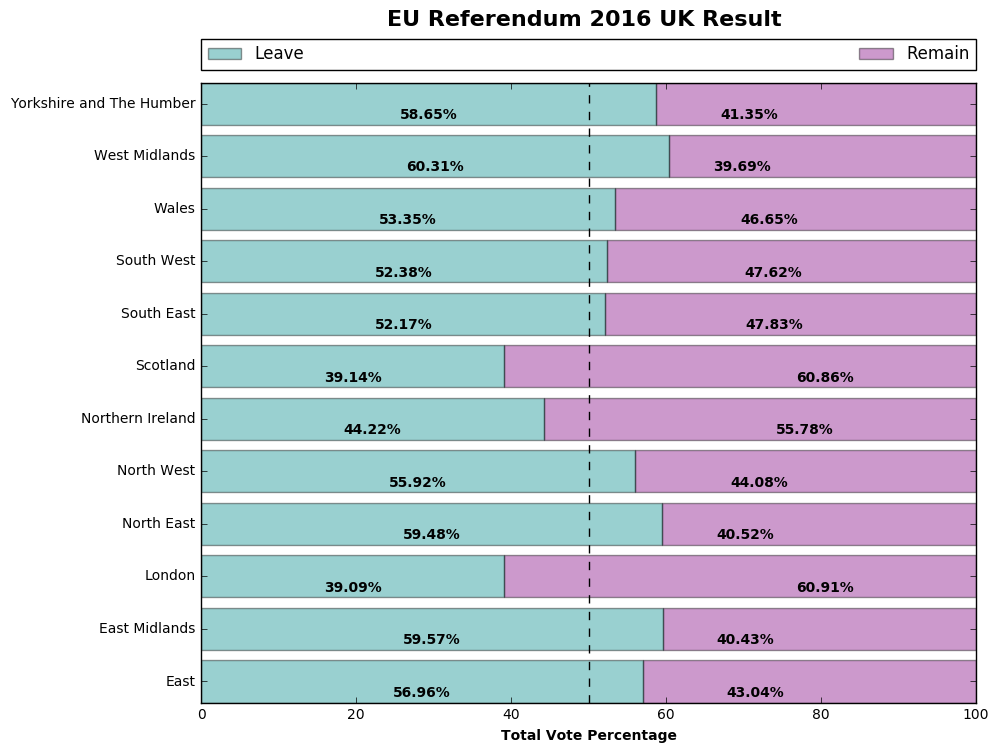

In [9]:
# plot UK 2016 ER referendum result
n = len(df_UK_ref_result)
Y = np.arange(n)
width = 0.1

X1 = df_UK_ref_result.Pct_Remain
X2 = df_UK_ref_result.Pct_Leave
X_half = ((X1+X2)/2)-X1

fig, ax = plt.subplots(figsize=(10,8))
rect1 = plt.barh(Y, X1, color = 'purple', alpha = 0.4,align='center',left=X2)
rect2 = plt.barh(Y, X2, color = 'darkcyan', alpha = 0.4,align='center')
plt.axvline(50, linestyle='--', color='k')
rect_text = plt.barh(Y, 2*X1+X2, color = 'purple', alpha = 0,align='center')

def autolabel(data):
    for ii,rect in enumerate(data):
    #for rect in data:
        height = rect.get_height()
        plt.text(rect.get_width(),rect.get_y()+0.05,'Remain', ha ='center', va='bottom',fontweight='bold')
def autolabel_percentage(rects,data):
# attach some text labels
    for ii,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_width()/2,rect.get_y()+0.05, str(round(data[ii],2))+'%', ha ='center', va='bottom',fontweight='bold')

        
#autolabel(rect_text)
autolabel_percentage(rect_text,X1)
autolabel_percentage(rect2,X2)


ax.set(yticks=Y, yticklabels=df_UK_ref_result.Region, xlim=[0,100])
#ax.grid(True)
ax.plot(stacked=True)
plt.title('EU Referendum 2016 UK Result ',fontweight='bold',fontsize='16',y = 1.08)
plt.xlabel('Total Vote Percentage',fontweight='bold',fontsize='10')
#plt.ylabel('Region in UK',fontweight='bold',fontsize='14')
plt.tight_layout
plt.legend((rect2,rect1),('Leave','Remain'),bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

## Result of EU Referendum 2016

From the graph shown above, we can clearly see that only Scotland, Northern Ireland, and London that voted to remain in EU. Specifically in Scotland, the percentage of people voted to stay in EU was very bold with only 39.14% voted to leave EU.

### Comparison of each Area in Scotland between Independent Referendum and EU Referendum

Next, we will present the result of two referendum mentioned before in each Area in scotland. According to our main research, we are interested to see the correlation between two referendum results.

In [10]:
# Retrieve only the scotland Region
scots_data = data_result.loc[data_result['Region'].isin(['Scotland'])]
#scots_data.head
# drop the region column
scots_data = scots_data.drop(['Region'],axis=1)
# Sort area column
scots_data.sort_values('Area',inplace=True,ascending=True)
df_scot_EUref = scots_data.reset_index(drop=True)
df_scot_EUref.head()

,Area,Pct_Turnout,Remain,Leave,Pct_Remain,Pct_Leave
0,Aberdeen City,67.94,63985,40729,61.10,38.90
1,Aberdeenshire,70.63,76445,62516,55.01,44.99
2,Angus,68.03,32747,26511,55.26,44.74
3,Argyll and Bute,73.13,29494,19202,60.57,39.43
4,City of Edinburgh,72.96,187796,64498,74.44,25.56


In [11]:
df_scot_EUref = df_scot_EUref.rename(columns = {'Remain':'RemainEU'})
df_scot_EUref = df_scot_EUref.rename(columns = {'Leave':'LeaveEU'})
df_scot_EUref.head()

,Area,Pct_Turnout,RemainEU,LeaveEU,Pct_Remain,Pct_Leave
0,Aberdeen City,67.94,63985,40729,61.10,38.90
1,Aberdeenshire,70.63,76445,62516,55.01,44.99
2,Angus,68.03,32747,26511,55.26,44.74
3,Argyll and Bute,73.13,29494,19202,60.57,39.43
4,City of Edinburgh,72.96,187796,64498,74.44,25.56


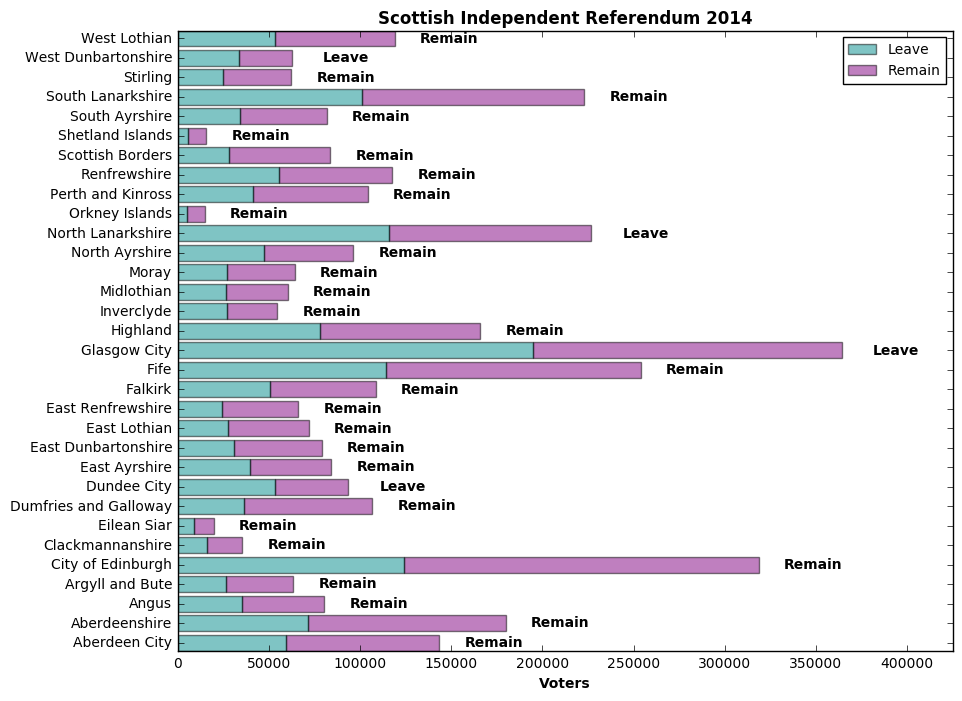

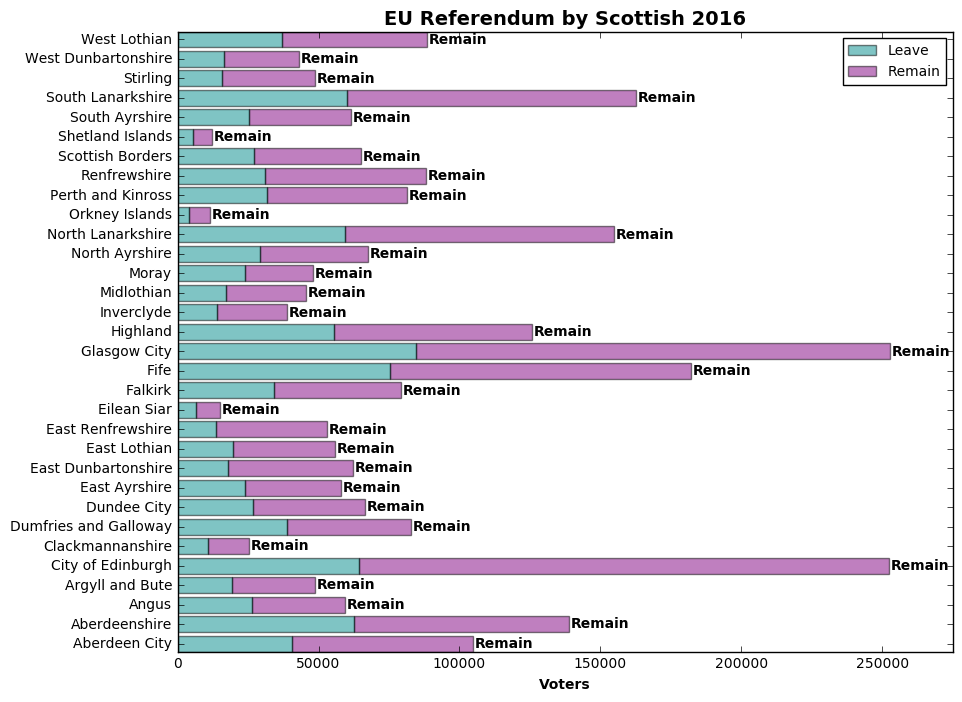

In [12]:
#-------------------Function for the Independent Referendum plot-------------------------

# plot the last referendum result

fig = plt.figure(figsize=(22,12))
#fig, ax = plt.subplots(figsize=(18,10))

n = len(df_scot_ref)
Y = np.arange(n)
width = 0.1

fig, ax = plt.subplots(figsize=(10,8))
X1 = df_scot_ref.RemainUK.astype('float64')
X2 = df_scot_ref.LeaveUK.astype('float64')
X_result = df_scot_ref.Result


rect1 = plt.barh(Y, X1, color = 'purple', alpha = 0.5,align='center',left=X2)
rect2 = plt.barh(Y, X2, color = 'darkcyan', alpha = 0.5,align='center')
rect_text = plt.barh(Y, X1+X2, color = 'purple', alpha = 0,align='center')

def autolabel(data):
    for ii,rect in enumerate(data):
    #for rect in data:
        height = rect.get_height()
        plt.text(30000+rect.get_width(),rect.get_y()+0.05,df_scot_ref.Result[ii], ha ='center', va='bottom',fontweight='bold')
    
        
autolabel(rect_text)


ax.set(yticks=Y, yticklabels=df_scot_ref.Area, xlim=[0,425000])
#ax.grid(True)
ax.plot(stacked=True)
plt.title('Scottish Independent Referendum 2014',fontweight='bold',fontsize='12')
plt.xlabel('Voters',fontweight='bold',fontsize='10')
plt.legend((rect2,rect1),('Leave','Remain'),fontsize='10')
plt.tight_layout
plt.show()

#-------------------Function for the EU Referendum plot-------------------------

# plot the last referendum result

n = len(df_scot_EUref)
Y = np.arange(n)
width = 0.1

X1 = df_scot_EUref.RemainEU
X2 = df_scot_EUref.LeaveEU
X_half = ((X1+X2)/2)-X1

fig, ax = plt.subplots(figsize=(10,8))
rect1 = plt.barh(Y, X1, color = 'purple', alpha = 0.5,align='center',left=X2)
rect2 = plt.barh(Y, X2, color = 'darkcyan', alpha = 0.5,align='center')
rect_text = plt.barh(Y, X1+X2, color = 'purple', alpha = 0,align='center')

def autolabel(data):
    for ii,rect in enumerate(data):
    #for rect in data:
        height = rect.get_height()
        plt.text(11000+rect.get_width(),rect.get_y()+0.05,'Remain', ha ='center', va='bottom',fontweight='bold')
    
        
autolabel(rect_text)


ax.set(yticks=Y, yticklabels=df_scot_EUref.Area, xlim=[0,275000])
#ax.grid(True)
ax.plot(stacked=True)
plt.title('EU Referendum by Scottish 2016',fontweight='bold',fontsize='14')
plt.xlabel('Voters',fontweight='bold',fontsize='10')
plt.tight_layout
plt.legend((rect2,rect1),('Leave','Remain'),fontsize='10')
plt.show()

### Comparison

According to the result that illustrated in two plots above, All area in scotland voted to remain in EU. Whereas, only 4 areas namely Dundee City, Glasgow City, North Lanarkshire, and West Dunbartonshire. 

### Correlation between the referendum results in Scotland

To look at a possible relationship between what people voted in the two polls, the following part looks at the correlation between the result for the two referendums in the different areas. This is done by looking at the correlation between people that voted to leave the UK in the different areas and people that voted to leave the EU.

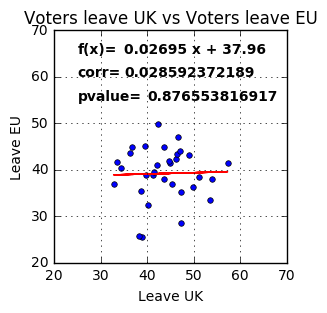

In [13]:
data_leave_UK = []
for i in range(len(df_scot_ref)):
      data_leave_UK .append(float(df_scot_ref['Pct_LeaveUK'][i]))

data_leave_EU = []
for i in range(len(df_scot_EUref)):
      data_leave_EU.append(float(df_scot_EUref['Pct_Leave'][i]))

slope, intercept, r_value, p_value, std_err = linregress(data_leave_UK, data_leave_EU)
fit = np.polyfit(data_leave_UK, data_leave_EU,1)
fit_function = np.poly1d(fit)
fig = plt.figure(figsize=(3, 3))
ax1 = fig.add_subplot(111)
plt.title('Voters leave UK vs Voters leave EU')
plt.plot(data_leave_UK, data_leave_EU,'bo', data_leave_UK,fit_function(data_leave_UK),'r', markersize = 4)
plt.xlim(20,70)
plt.ylim(20,70)
plt.xlabel('Leave UK', fontsize=10)
ax1.set_ylabel('Leave EU', fontsize=10)  
ax1.text(25,65,'f(x)=',fontweight='bold')
ax1.text(35,65,fit_function,fontweight='bold')
ax1.text(25,60,'corr=',fontweight='bold')
ax1.text(35,60,r_value,fontweight='bold')
ax1.text(25,55,'pvalue=',fontweight='bold')
ax1.text(40,55,p_value,fontweight='bold')
ax1.grid(True)

The scatter plot plots the different areas in Scotland on the percentage of people that voted to leave the EU and voted to leave the UK in these areas. As can be seen there seems to be no linear relation between the two votes. The correlation is very small and the p-value shows that it is not significant.

## Conclusion

In this chapter the overal results from the two referenda were shown. All Scottish Council Areas voted to remain in the EU. In the independence referendum, four areas voted to become independent.
When looking at the correlation between these results, there seems to be no relation between the two votes.

## II. Demographic Analysis

The previous chapter showed that out of all the Scottish Council Areas, only four (Dundee, Glasgow, West Dunbartonshire and North Lanarkshire) voted to become independent during the Scottish independent vote. Post-referendum polls from the independent referendum show that people who voted yes where younger and lived in areas with a higher unemployment (Leach, 2014). 
In this chapter demographic stats about age and employment will be used to look at the relation between these demographic stats and the areas that voted to leave the UK. 

http://www.mirror.co.uk/news/ampp3d/scotland-referendum-who-voted-yes-4286743

To do this, demographic information about age and employment is downloaded from the official Scottish statistics. The age is divided in age groups: children, these are not relevant for this analysis; working age; and pensionable age. The employment shows the number of people over 16 that are employed.

The demographic data about age groups has been updated in 2014. The employment data, however, comes from 2011. It is assumed that this data has not changed significantly since that time.


### Getting the demographic data

In [14]:
# Read the csv data, skipping the first lines of explanation and just selecting the Council Areas
age_groups = pd.read_csv("population-estimate-groups.csv",delimiter=',',skiprows=8,skipfooter=14,engine='python')

# Overview of the dataset
age_groups.head()

,http://purl.org/linked-data/sdmx/2009/dimension#refArea,Reference Area,Children,Pensionable Age,Working Age
0,http://statistics.gov.scot/id/statistical-geog...,Scotland,911282,1059104,3377214
1,http://statistics.gov.scot/id/statistical-geog...,Aberdeen City,33566,37426,157998
2,http://statistics.gov.scot/id/statistical-geog...,Aberdeenshire,48681,50350,161469
3,http://statistics.gov.scot/id/statistical-geog...,Angus,19681,27864,69115
4,http://statistics.gov.scot/id/statistical-geog...,Argyll and Bute,13594,23036,51030


In [15]:
# Get the right columns from the datafile
age_result = age_groups[['Reference Area','Children','Pensionable Age','Working Age']]

#Overview of the dataset
age_result.head()

,Reference Area,Children,Pensionable Age,Working Age
0,Scotland,911282,1059104,3377214
1,Aberdeen City,33566,37426,157998
2,Aberdeenshire,48681,50350,161469
3,Angus,19681,27864,69115
4,Argyll and Bute,13594,23036,51030


In [16]:
# Read the csv data, skipping the first lines of explanation and just selecting the Council Areas
employm = pd.read_csv("employment.csv",delimiter=',',skiprows=8)

# Get the right columns from the datafile
employm = employm[['Reference Area','16 And Over']]

# Overview of the dataset
employm.head()


,Reference Area,16 And Over
0,Scotland,2463800
1,Aberdeen City,117500
2,Aberdeenshire,130900
3,Angus,50400
4,Argyll and Bute,38700


In [17]:
# Renaming the column
employm.rename(columns = {employm.columns[1]:"Employment 16>"}, inplace= True)

employm.head()

,Reference Area,Employment 16>
0,Scotland,2463800
1,Aberdeen City,117500
2,Aberdeenshire,130900
3,Angus,50400
4,Argyll and Bute,38700


In [18]:
dem_result = pd.merge(age_result, employm, on='Reference Area')
dem_result

,Reference Area,Children,Pensionable Age,Working Age,Employment 16>
0,Scotland,911282,1059104,3377214,2463800
1,Aberdeen City,33566,37426,157998,117500
2,Aberdeenshire,48681,50350,161469,130900
3,Angus,19681,27864,69115,50400
4,Argyll and Bute,13594,23036,51030,38700
5,City of Edinburgh,75358,80719,336603,251100
6,Clackmannanshire,9082,10299,31809,21600
7,Dumfries and Galloway,23928,38870,87142,63500
8,Dundee City,23758,28017,96485,65700
9,East Ayrshire,21162,25405,75583,52600


### Calculating the ratio

Because the data only shows the total number of people in each category and not the ratio, this will be computed in the following steps.

In [19]:
# Include the total population of each area

def to1(row):
    total = row['Children']+row['Pensionable Age']+row['Working Age']
    return total

# For looking at the employment
def to2(row):
    total = row['Pensionable Age']+row['Working Age']
    return total

dem_result['Total Population'] = dem_result.apply(to1, axis=1)
dem_result['Total 16>'] = dem_result.apply(to2, axis=1)
dem_result.head()

,Reference Area,Children,Pensionable Age,Working Age,Employment 16>,Total Population,Total 16>
0,Scotland,911282,1059104,3377214,2463800,5347600,4436318
1,Aberdeen City,33566,37426,157998,117500,228990,195424
2,Aberdeenshire,48681,50350,161469,130900,260500,211819
3,Angus,19681,27864,69115,50400,116660,96979
4,Argyll and Bute,13594,23036,51030,38700,87660,74066


In [20]:
#Include the percentages
#Percentages for age groups
def get_perc(data):
    for i in range(len(dem_result.columns)-4):
        column_name =  dem_result.columns[i+1]
        new_column = '% ' + column_name
        perc_list = []
        for i in range(len(dem_result)):
            x = dem_result[column_name][i]
            y = dem_result['Total Population'][i]
            result = x/y*100
            perc_list.append(result)
        dem_result[new_column] = perc_list
        
#Percentage for employment (calculated with just the population > 16)
def get_perc_emp(data):
        column_name =  dem_result.columns[4]
        new_column = '% ' + column_name
        perc_list = []
        for i in range(len(dem_result)):
            x = dem_result[column_name][i]
            y = dem_result['Total 16>'][i]
            result = x/y*100
            perc_list.append(result)
        dem_result[new_column] = perc_list

get_perc(dem_result)
get_perc_emp(dem_result)
dem_result.head()

,Reference Area,Children,Pensionable Age,Working Age,Employment 16>,Total Population,Total 16>,% Children,% Pensionable Age,% Working Age,% Employment 16>
0,Scotland,911282,1059104,3377214,2463800,5347600,4436318,17.040953,19.805221,63.153826,55.537047
1,Aberdeen City,33566,37426,157998,117500,228990,195424,14.658282,16.343945,68.997773,60.125675
2,Aberdeenshire,48681,50350,161469,130900,260500,211819,18.687524,19.328215,61.984261,61.798045
3,Angus,19681,27864,69115,50400,116660,96979,16.870393,23.884793,59.244814,51.970014
4,Argyll and Bute,13594,23036,51030,38700,87660,74066,15.507643,26.278804,58.213552,52.250695


### Comparing the percentages

Children (under 16) were not allowed to vote in the referendum, so this group has been removed.

In [21]:
#Cleaning up the data a bit by showing just the percentages
dem_perc = dem_result.ix[:,['Reference Area', '% Pensionable Age', '% Working Age', '% Employment 16>']]

dem_perc.head()

,Reference Area,% Pensionable Age,% Working Age,% Employment 16>
0,Scotland,19.805221,63.153826,55.537047
1,Aberdeen City,16.343945,68.997773,60.125675
2,Aberdeenshire,19.328215,61.984261,61.798045
3,Angus,23.884793,59.244814,51.970014
4,Argyll and Bute,26.278804,58.213552,52.250695


One way to look at the relationship between demographic stats and voting behaviour is to look at the difference between the ratio in each area and the Scottish average. The following table shows this difference.

In [22]:
#Including the difference between the Scottish average and the Council Areas
def get_dif(data):
    for i in range(len(dem_perc.columns)-1):
        column_name =  dem_perc.columns[i+1]
        new_column = 'Difference ' + column_name
        perc_list = []
        for i in range(len(dem_perc)):
            x = dem_perc[column_name][i]
            y = dem_perc[column_name][0]
            result = y - x
            perc_list.append(result)
        dem_perc[new_column] = perc_list

get_dif(dem_perc)

# Rearranging the columns
cols = dem_perc.columns.tolist()
cols = ['Reference Area', '% Pensionable Age', 'Difference % Pensionable Age', '% Working Age', 'Difference % Working Age',
       '% Employment 16>', 'Difference % Employment 16>']

dem_perc = dem_perc[cols]

dem_perc.head()

,Reference Area,% Pensionable Age,Difference % Pensionable Age,% Working Age,Difference % Working Age,% Employment 16>,Difference % Employment 16>
0,Scotland,19.805221,0.000000,63.153826,0.000000,55.537047,0.000000
1,Aberdeen City,16.343945,3.461276,68.997773,-5.843947,60.125675,-4.588629
2,Aberdeenshire,19.328215,0.477006,61.984261,1.169565,61.798045,-6.260998
3,Angus,23.884793,-4.079572,59.244814,3.909012,51.970014,3.567033
4,Argyll and Bute,26.278804,-6.473583,58.213552,4.940274,52.250695,3.286351


In [23]:
#Change area keys
dem_perc['Reference Area'] = dem_perc['Reference Area'].str.replace('Na h-Eileanan Siar','Eilean Siar')

dem_perc.rename(columns = {dem_perc.columns[0]:"Area"}, inplace= True)

dem_perc.head()

,Area,% Pensionable Age,Difference % Pensionable Age,% Working Age,Difference % Working Age,% Employment 16>,Difference % Employment 16>
0,Scotland,19.805221,0.000000,63.153826,0.000000,55.537047,0.000000
1,Aberdeen City,16.343945,3.461276,68.997773,-5.843947,60.125675,-4.588629
2,Aberdeenshire,19.328215,0.477006,61.984261,1.169565,61.798045,-6.260998
3,Angus,23.884793,-4.079572,59.244814,3.909012,51.970014,3.567033
4,Argyll and Bute,26.278804,-6.473583,58.213552,4.940274,52.250695,3.286351


In [24]:
df_scot= df_scot_ref[['Area','Pct_LeaveUK']]
df_scot_ref.head()
total_scot = df_scot.Pct_LeaveUK.mean()
print 'the total percentage of  vote leaving UK is ' + str(total_scot)
#df_total_scot_pct = pd.DataFrame([['Scotland',str(total_scot)]],columns=['Area','Pct_LeaveUK'])
#pd.concat([df_total_scot_pct,df_scot])

the total percentage of  vote leaving UK is 43.5506633925


In [25]:
df_total_scot_pct = pd.DataFrame([['Scotland',str(total_scot)]],columns=['Area','Pct_LeaveUK'])
df_scot_pct = pd.concat([df_total_scot_pct,df_scot])
# rename the column
df_scot_pct = df_scot_pct.rename(columns = {'Pct_LeaveUK':'% Yes to independence'})

In [26]:
# Merge with data from Independence referendum
dem_ind = pd.merge(dem_perc, df_scot_pct, on='Area')
dem_ind.head()

,Area,% Pensionable Age,Difference % Pensionable Age,% Working Age,Difference % Working Age,% Employment 16>,Difference % Employment 16>,% Yes to independence
0,Scotland,19.805221,0.000000,63.153826,0.000000,55.537047,0.000000,43.5506633925
1,Aberdeen City,16.343945,3.461276,68.997773,-5.843947,60.125675,-4.588629,41.3395
2,Aberdeenshire,19.328215,0.477006,61.984261,1.169565,61.798045,-6.260998,39.6218
3,Angus,23.884793,-4.079572,59.244814,3.909012,51.970014,3.567033,43.6403
4,Argyll and Bute,26.278804,-6.473583,58.213552,4.940274,52.250695,3.286351,41.4447


To make it easier to compare the differences between the different areas a table and a bar chart are used.

In [27]:
dem_ind_sort = dem_ind.ix[:,[0,2,4,6,7]]

dem_ind_sort.sort_values(['% Yes to independence'], ascending = False, inplace = True)

def color_negative_red(val):
    if isinstance(val, str):
        return val
    elif val < 0:
        color = 'red'
    elif val > 50:
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color

dem_ind_c = dem_ind_sort.style.applymap(color_negative_red)
dem_ind_c

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


This table shows that the four areas that voted for independence (the first four areas) all have the same demographic inclinations. They have a higher percentage of people in a pensionable age, a lower percentage of people of a working age and a higher employment rate. 
Incidentally, this combination of these three stats is not seen in any of the other areas.

Below the results from this table are shown in a bar chart. In these charts can be seen that the four areas that voted independence, the green areas, all have the same inclinations.

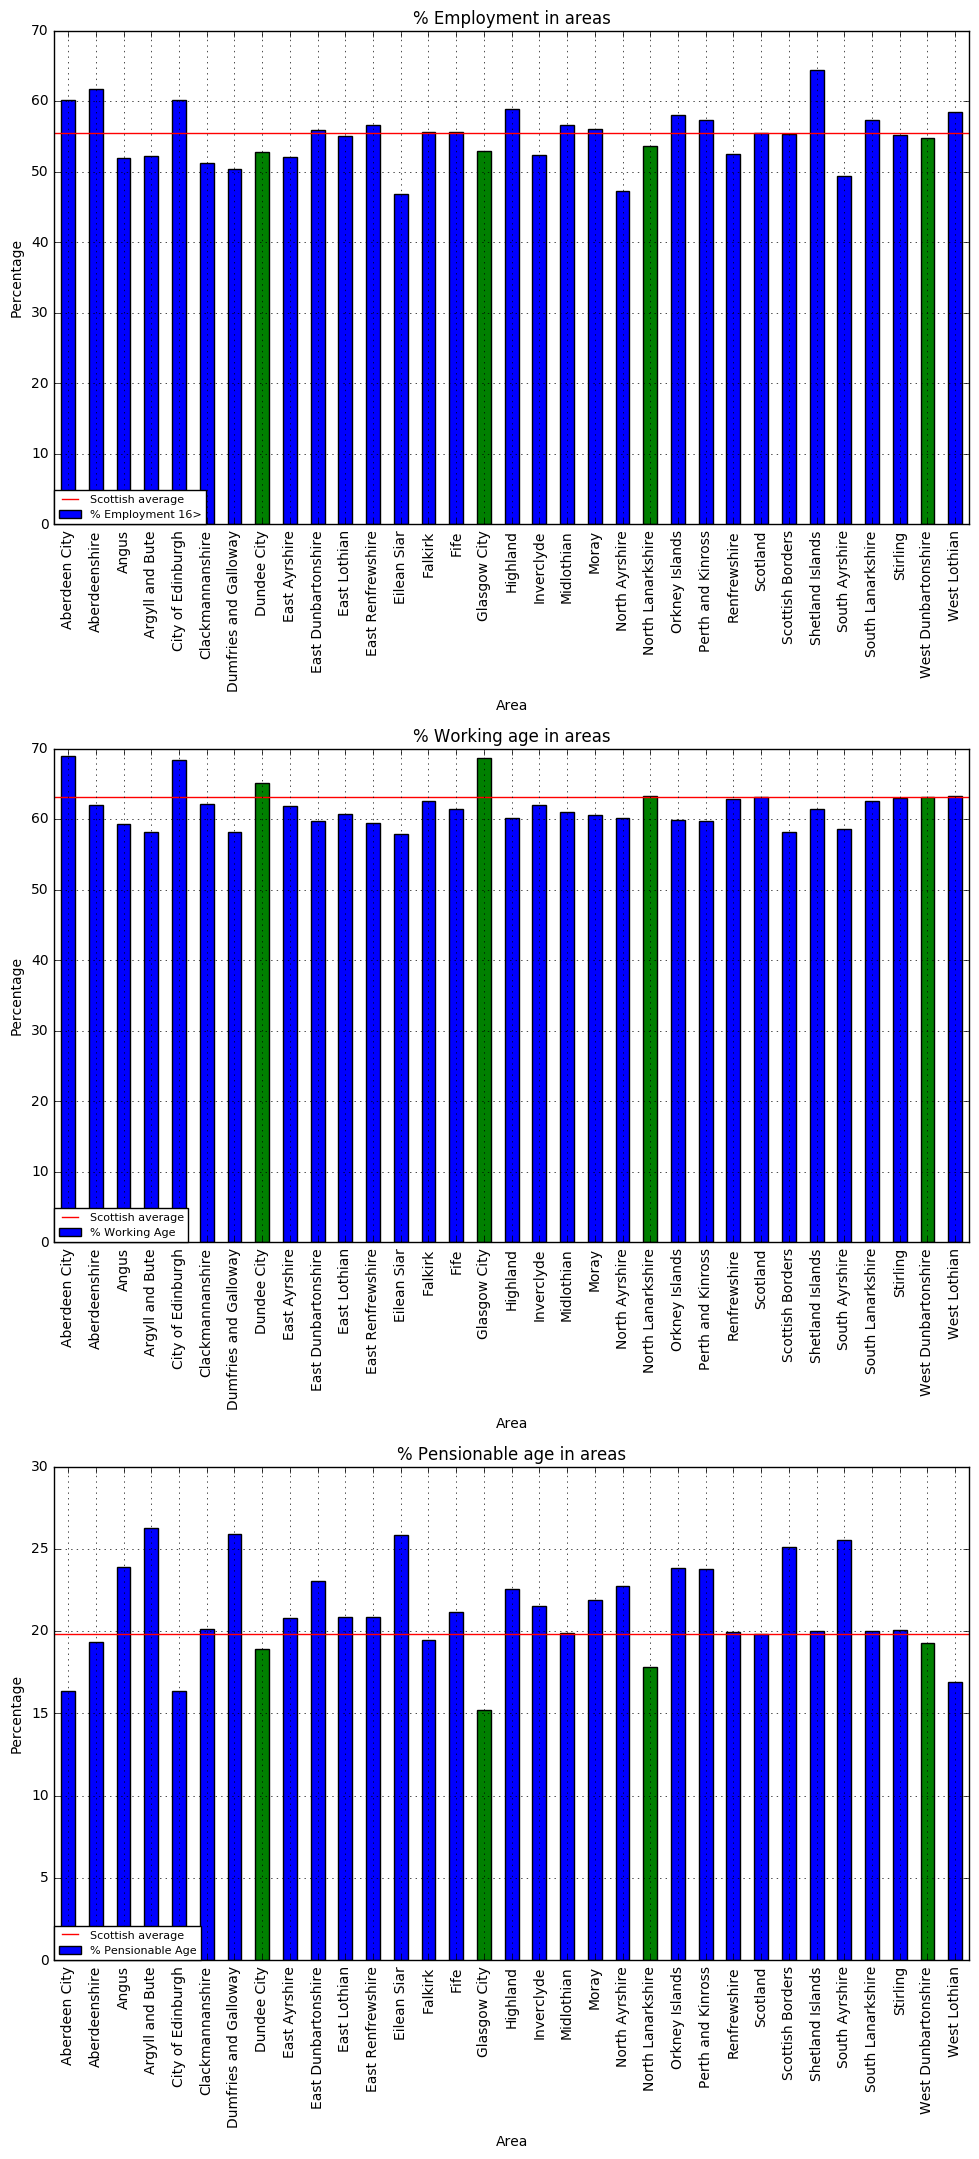

In [28]:
# getting the average Scottish value
avg_pa = dem_ind.iloc[0:1,1]
avg_wa = dem_ind.iloc[0:1,3]
avg_ep = dem_ind.iloc[0:1,5]

key_list_bar = ['% Employment','% Working age', '% Pensionable age']
new_list_bar = ['% Employment 16>','% Working Age','% Pensionable Age']
avg_list_bar = [avg_ep, avg_wa, avg_pa]

# Creating a list with the right order so the areas that voted independence can be easily seen
data_area_list = []
for i in range(len(dem_ind)):
      data_area_list.append(dem_ind['Area'][i])
data_area_list.sort()

for idx, item in enumerate(data_area_list):
    if item == 'Dundee City' or item == 'Glasgow City' or item == 'West Dunbartonshire' or item == 'North Lanarkshire':
        data_area_list[idx] = 'green'
    else:
        data_area_list[idx] = 'blue'

dem_ind_plot = dem_ind.groupby('Area')

plt.figure(figsize=(10,20))
for i in range(len(new_list_bar)):
    plt.subplot(3,1,i+1)
    plt.title(str(key_list_bar[i]) +' in areas')
    plt.tight_layout()
    dem_ind_plot[new_list_bar[i]].mean().plot(kind='bar', color=data_area_list)
    plt.plot([-5,100], [avg_list_bar[i],avg_list_bar[i]], color='red', linestyle='-', label='Scottish average')
    plt.ylabel('Percentage') 
    plt.legend(loc=[0,0], prop={'size':8})
    plt.grid(True)

### Correlation between the variables

Another way to look at the relationship between demographic stats and voting behaviour is to look at a possible correlation between the variables. The following step looks at the correlation between all variables.

In [29]:
dem_ind.corr(method='pearson')

,% Pensionable Age,Difference % Pensionable Age,% Working Age,Difference % Working Age,% Employment 16>,Difference % Employment 16>
% Pensionable Age,1.000000,-1.000000,-0.910720,0.910720,-0.445413,0.445413
Difference % Pensionable Age,-1.000000,1.000000,0.910720,-0.910720,0.445413,-0.445413
% Working Age,-0.910720,0.910720,1.000000,-1.000000,0.335915,-0.335915
Difference % Working Age,0.910720,-0.910720,-1.000000,1.000000,-0.335915,0.335915
% Employment 16>,-0.445413,0.445413,0.335915,-0.335915,1.000000,-1.000000
Difference % Employment 16>,0.445413,-0.445413,-0.335915,0.335915,-1.000000,1.000000


To really look at the correlation and significance of the possible relations three scatter plots are created.

In [30]:
#Creates lists used for the plots

data_work_list = []
for i in range(len(dem_ind)):
      data_work_list.append(dem_ind['% Working Age'][i])

data_emp_list = []
for i in range(len(dem_ind)):
      data_emp_list.append(dem_ind['% Employment 16>'][i])
        
data_ind_list = []
for i in range(len(dem_ind)):
      data_ind_list.append(float(dem_ind['% Yes to independence'][i]))
        
data_pens_list = []
for i in range(len(dem_ind)):
      data_pens_list.append(dem_ind['% Pensionable Age'][i])
        

slope, intercept, r_value, p_value, std_err = linregress(data_ind_list, data_emp_list)

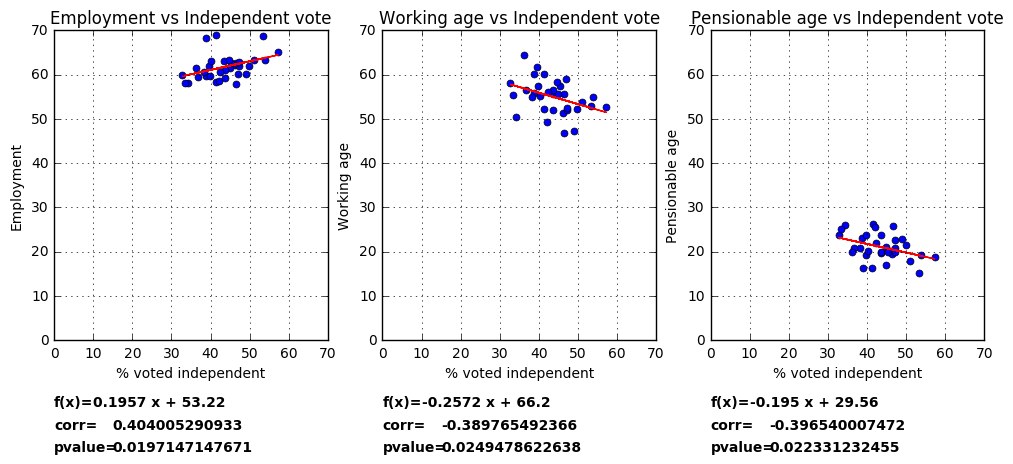

In [31]:
#Create the scatterplots with regression line
key_list = ['Employment','Working age', 'Pensionable age']
new_list = [data_work_list,data_emp_list,data_pens_list]

plt.figure(figsize=(12,4))
for i in range(len(new_list)):
    plt.subplot(1,3,i+1)
    # Used to get the correlation and p values
    slope, intercept, r_value, p_value, std_err = linregress(data_ind_list, new_list[i])
    fit = np.polyfit(data_ind_list,new_list[i],1)
    fit_function = np.poly1d(fit)
    plt.title(str(key_list[i]) +' vs Independent vote')
    plt.plot(data_ind_list, new_list[i],'bo', data_ind_list,fit_function(data_ind_list),'r', markersize = 5)
    plt.xlim(0,70)
    plt.ylim(0,70)
    plt.xlabel('% voted independent', fontsize=10)
    plt.ylabel(str(key_list[i]), fontsize=10)  
    plt.text(0,-15,'f(x)=',fontweight='bold')
    plt.text(10,-15,fit_function,fontweight='bold')
    plt.text(0,-20,'corr=',fontweight='bold')
    plt.text(15,-20,r_value,fontweight='bold')
    plt.text(0,-25,'pvalue=',fontweight='bold')
    plt.text(15,-25,p_value,fontweight='bold')
    plt.grid(True)

As can be seen in the scatter plots and the corresponding p-values, there seems to be a significant relationship between all three the variables and the percentage of people that voted independence. 
Looking at the correlations the following can be noted according to this data:

The higher the percentage of people that are employed in an area, the higher the percentage that voted independence.

The lower the percentage of people that are of working age in an area, the higher the percentage that voted independence.

The lower the percentage of people that are of pensionable age in an area, the higher the percentage that voted independence.


### Conclusion

The two methods used to look at the relationship between demographic stats and vote in the independent referendum show different results. 

While just looking at the areas that voted independence, it can be noted that they have the same demographic stats concerning age and employment. Furthermore, they are the only areas to have these stats. All four a higher than average percentage of people of a pensionable age and of people employed, but a lower than average percentage of people of a working age.

While looking at the correlations there seems to be a relationship between all three demographic stats and the percentage of people that voted independence. The difference with the other method is that the correlations show that the higher the percentage of people of pensionable age, the lower the percentage of people who voted for independence. 

Both results have different outcomes from the post-referendum polls that were referenced to earlier and stated that people who voted yes were younger and lived in areas with a higher unemployment.

One of the reasons for this difference might be that this chapter used the different areas in Scotland as a way to look at the relationship between demographics and votes. This is because personal information about who voted what is not readily available. It is however difficult to draw valid conclusions with only this data.


## III. Analysis of current polls (Scotland Referendum)

## Theory of the model used to forecast the next Scotland referendum result

In this part, our aim is to predict the outcome of the new referendum. To do that, we first merge the two-old election results by area name. The previous work done on these two election files showed no correlation, however in this part, we will try to find correlation with using difference between the means.

To calculate the correlation between the results Brexit and Independence Referendum for Scotland, we can make a difference between means test to test our hypothesis.

The hypothesis where the groups of voters in Scotland who voted to stay at UK like to stay at EU and vice versa will be tested by difference between means test. 

    M1= Voters in the area who voted “leave” in the Independence Referendum as percentage 
    M2 (ratioUK)= Voters in the area who voted “remain” in the Independence Referendum as percentage
    M3= Voters in the area who voted “leave” in the EU Referendum as percentage
    M4 (ratioEU)= Voters in the area who voted “remain” in the EU Referendum as percentage

    M1 + M2 = M3 + M4 = 100
    
               |    EU    |
               |LEAVE|STAY|
    |   | LEAVE|  A  |  B |
     UK  -----------------
    |   | STAY |  C  |  D |
     ---------------------

    A+B= M1, C+D= M2, A+C= M3, B+D= M4

We are interested in population that will change their mind because of results of Brexit. The population who are voted stay at UK because of staying at EU can be described as part of D and population who voted leave at UK because they didn’t want to be part of EU and now they will vote yes because Brexit occurred can be describes as part of A.

Problem occurs because there is no possible way to get D and A individually therefore we need an approximation such as a difference between means and represent D as M1-M3 (B-C) and A as M1-(100-M3) (A-D). The relation seems vague however the relation behaves as we predicted.

Hypothesis suggest that M2 will behave similarly to M4 so as M1 and M3, since M4=100-M3 and M1=100-M2. We will check the correlation between M1 -M3 and M1 -M4 with difference between group mean test.

$$ \text{difference} \text{ between} \text{ means} = \sum_{i=0}^\text{n} \text{M1} - \text{M3} \text{ and } \sum_{i=0}^\text{n} \text{M1} - \text{M4}   $$

For example, the Angus area of Scotland M1=43.68 and M3=44.74 so difference between the means are M1-M3 and M1-(100-M3) which are 1.06 and 11.58. This shows that Angus area has similar behavior as our hypothesis predicted.

The results show that area of voters who behaved similarly as our hypothesis predicted is almost twice as likely than the counter option. This relation supports our hypothesis however to proceed, we should make some assumptions about our hypothesis. 
We should assume that even though these groups populations are huge, there are enough areas to reduce stochastic behavioral error and make our findings meaningful. Also, we assume that even though there is no direct correlation to support this hypothesis, it is because this effect will occur after Brexit and voters will change their mind creating that effect. Second assumption is valid since now, the Scotland is already not a member of EU so effect of second population is already considered in Brexit. Lastly, the prediction function includes the small effect of the population who wanted to stay at UK because of remaining at EU is large and the people who vote leave because they did not want to stay at EU (Lane, n.d.). 

In [32]:
# redefine the dataframe (to secure the previous dataframe )
df1 = df_scot_EUref
# redefine the dataframe (to secure the previous dataframe )
df2 = df_scot_ref
# merge the dataframe on the same key, in this case 'Area' in scotland
df_total = pd.merge(df1, df2, on='Area')
df_total.head()

,Area,Pct_Turnout,RemainEU,LeaveEU,Pct_Remain,Pct_Leave,Total Votes Counted,LeaveUK,RemainUK,Rejected Papers,Result,Pct_LeaveUK,Pct_RemainUK
0,Aberdeen City,67.94,63985,40729,61.10,38.90,143664,59390,84094,180,Remain,41.339514,58.535193
1,Aberdeenshire,70.63,76445,62516,55.01,44.99,180045,71337,108606,102,Remain,39.621761,60.321586
2,Angus,68.03,32747,26511,55.26,44.74,80302,35044,45192,66,Remain,43.640258,56.277552
3,Argyll and Bute,73.13,29494,19202,60.57,39.43,63516,26324,37143,49,Remain,41.444675,58.478179
4,City of Edinburgh,72.96,187796,64498,74.44,25.56,319025,123927,194638,460,Remain,38.845545,61.010266


In [33]:
#totalpop1 = The sum of voters of area who voted yes and no in Independence Referendum
totalpop1 = df_total['LeaveUK'].astype('float64') + df_total['RemainUK'].astype('float64')

#totalpop2 = The sum of voters of area who voted yes and no in Brexit
totalpop2 = df_total['LeaveEU'].astype('float64') + df_total['RemainEU'].astype('float64')

In [34]:
#ratioUK = Percentage of voters who voted remain in IR
ratioUK = df_total['RemainUK'].astype('float64')/totalpop1
#ratioEU = Percentage of voters who voted remain in Brexit
ratioEU = df_total['RemainEU'].astype('float64')/totalpop2
#tdif = Supporting theory of difference between means of ratioUK and ratioEU
tdif=ratioEU-ratioUK 
#ctdif = Counter theory of difference between means of ratioUK and ratioEU
ctdif=1-ratioEU-ratioUK

#tpop = absolute value of tdif*totalpop1 which is the number of voters in extreme supporting conditions
tpop=abs(tdif*totalpop1)
#ctpop = absolute value of ctdif*totalpop1 
ctpop=abs(ctdif*totalpop1)

In [35]:
#ratioUK = Percentage of voters who voted remain in IR
ratioUK = df_total['RemainUK'].astype('float64')/totalpop1
#ratioEU = Percentage of voters who voted remain in Brexit
ratioEU = df_total['RemainEU'].astype('float64')/totalpop2
#tdif = Supporting theory of difference between means of ratioUK and ratioEU
tdif=ratioEU-ratioUK 
#ctdif = Counter theory of difference between means of ratioUK and ratioEU
ctdif=1-ratioEU-ratioUK

In [36]:
#ratio =  ratio of the sum of tpop/ctpop
ratio=sum(ctpop)/sum(tpop)
#x = the adjusted ratio will be used in the funciton
x=1-(ratio/(ratio+1))
print 'The ratio is ' + str(x)

The ratio is 0.334932646645


## Analysis of hypothesis

After calculating the how likely the people will switch votes after Brexit, now we can predict the vote ratios in areas. We assume that the new remain voters are the old remain voters minus the people who voted remain at UK for remaining at EU. Since our hypothesis is twice as likely from the counter option, we can derive a variable x in python close to 1/3 for accuracy of prediction. From these findings, we can now calculate the new Independence votes casted by each area and the overall turnout of the vote. 


In [37]:
#newremain = is the ratio of the remain votes new IR for Scotlands areas
newremain=ratioUK-x*(ratioEU*2-1)
#remainvote = percentage of votes of each area to remain in IR 
remainvote=newremain*(df_total['LeaveUK'].astype('float64')+df_total['RemainUK'].astype('float64'))
print newremain.head()
print remainvote.head()

0    0.511701
1    0.569985
2    0.527992
3    0.514445
4    0.447299
dtype: float64
0     73420.884095
1    102564.852415
2     42363.957916
3     32650.253233
4    142493.963142
dtype: float64


In [38]:
#result = sum of total remain votes/ total votes
result_predict = remainvote/totalpop1
result_predict.head()

0    0.511701
1    0.569985
2    0.527992
3    0.514445
4    0.447299
dtype: float64

There are 3 types of graph; a bar, doughnut and pie chart used for representing the individual votes in areas and to show the overall result. 

Start combining overall 2014 referendum Result and prediction.

<class 'pandas.core.series.Series'>


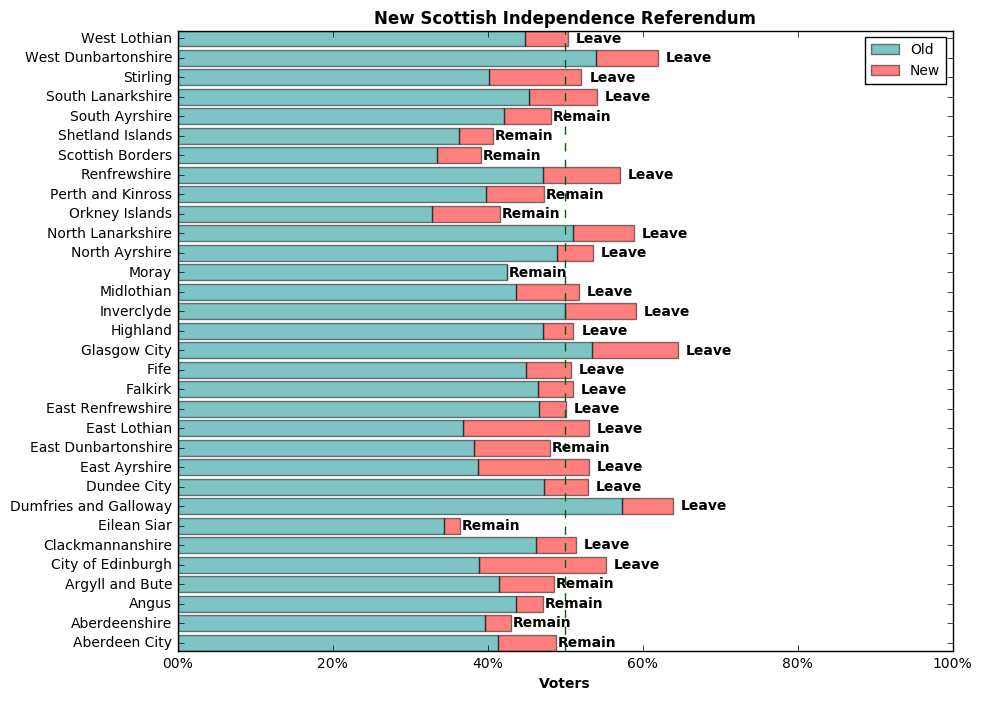

In [39]:
remainvotetotal=newremain*(df_total['LeaveUK'].astype('float64')+df_total['RemainUK'].astype('float64'))
newleave=1-newremain
totalvoter=df_total['LeaveUK'].astype('float64')+df_total['RemainUK'].astype('float64')
leavevotetotal=(1-newremain)*(df_total['LeaveUK'].astype('float64')+df_total['RemainUK'].astype('float64'))
result = sum(remainvotetotal)/sum(totalpop1)
print(type(remainvotetotal))
i=0
resultotal=[]
for i in range(len(remainvotetotal)):
    if remainvotetotal[i]>leavevotetotal[i]:
        resultotal.append('Remain')
    else:
        resultotal.append('Leave')

#plot the last referendum result
import matplotlib.ticker as mtick
fig = plt.figure(figsize=(22,8))
#fig, ax = plt.subplots(figsize=(18,10))

n = len(df_scot_ref)
Y = np.arange(n)
width = 0.1

df_total['RemainUK'].astype('float64')
fig, ax = plt.subplots(figsize=(10,8))
X2 = (df_total['LeaveUK'].astype('float64')/totalvoter.astype('float64'))*100
X1 = (newleave.astype('float64')-df_total['LeaveUK'].astype('float64')/totalvoter.astype('float64'))*100

X_result = resultotal

rect1 = plt.barh(Y, X1, color = 'red', alpha = 0.5,align='center',left=X2)
rect2 = plt.barh(Y, X2, color = 'darkcyan', alpha = 0.5,align='center')
rect_text = plt.barh(Y, X1+X2, color = 'purple', alpha = 0,align='center')

def autolabel(data):
    for ii,rect in enumerate(data):
    #for rect in data:
        height = rect.get_height()
        plt.text(4+rect.get_width(),rect.get_y()+0.05,X_result[ii], ha ='center', va='bottom',fontweight='bold')
    
autolabel(rect_text)


ax.set(yticks=Y, yticklabels=df_scot_ref.Area, xlim=[0,100])
#ax.grid(True)
ax.plot(stacked=True)
plt.title('New Scottish Independence Referendum',fontweight='bold',fontsize='12')
plt.xlabel('Voters',fontweight='bold',fontsize='10')
plt.legend((rect2,rect1),('Old','New'),fontsize='10')
plt.tight_layout
plt.axvline(x=50,color='darkgreen',linestyle='--')
fmt = '%.2i%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
plt.show()

In [40]:
overall_pct_remain_UK = (df_total['Pct_RemainUK'].mean()/100)
overall_pct_leave_UK =  (df_total['Pct_LeaveUK'].mean()/100)
old_list = [overall_pct_remain_UK] + [overall_pct_leave_UK]
print old_list

# get the overall precentation result from whole scotland
overall_pct_remain_UK_predict = result
overall_pct_Leave_UK_predict = 1-result
prediction_list = [overall_pct_remain_UK_predict] + [overall_pct_Leave_UK_predict]
print(prediction_list)

[0.5636163800409092, 0.4355066339245849]
[0.47314028657409252, 0.52685971342590743]


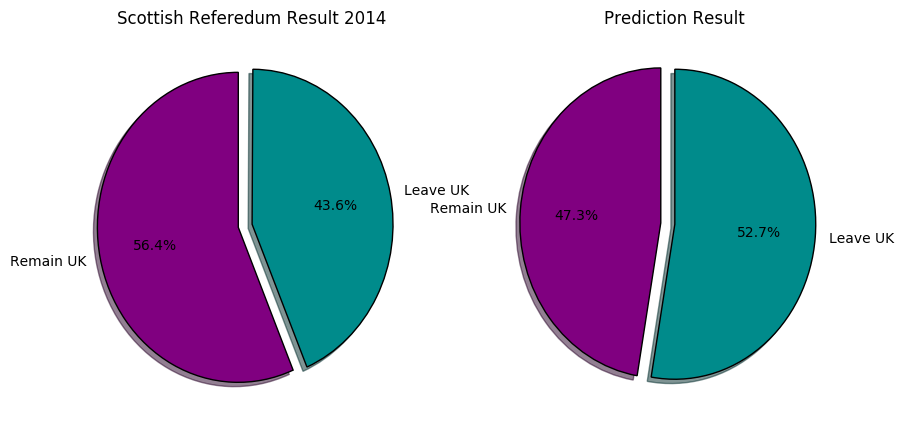

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(old_list, explode=(0.1,0), labels=['Remain UK', 'Leave UK'], colors=('purple','darkcyan'),
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Scottish Referendum Result 2014')


plt.subplot(1,2,2)
plt.pie(prediction_list, explode=(0.1,0), labels=['Remain UK', 'Leave UK'], colors=('purple','darkcyan'),
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Prediction Result')

plt.show()

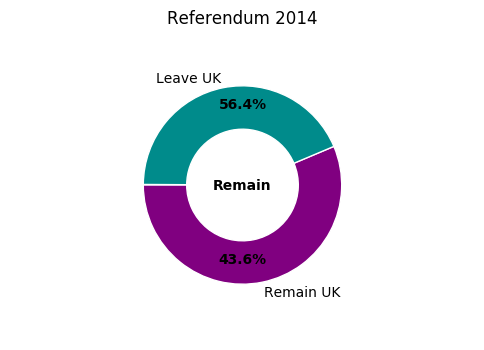

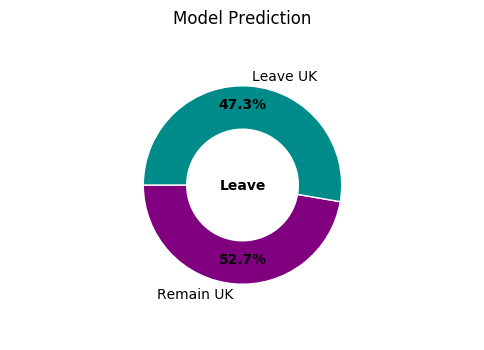

In [42]:
def make_doughnut(data, title,labels):
    import matplotlib.pyplot as plt
    import numpy as np

    # defie the condition of final result
    if data[0] > data[1]:
        text = 'Remain'
    else:
        text = 'Leave'
    c1 = 'purple'
    c2 = 'darkcyan'
    fig, ax = plt.subplots()
    ax.axis('equal')
    width = 0.35
    kwargs = dict(colors=[c1,c2], startangle=180)
    outside, _ = ax.pie(data, radius=0.8, pctdistance=1-width/2,labels=labels,**kwargs)
    plt.setp( outside, width=width, edgecolor='white')

    kwargs = dict(size=10, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    ax.text(0, 0.65, str(round(data[0],3)*100) +'%', ha='center', **kwargs)
    ax.text(0, -0.6, str(round(data[1],3)*100) +'%', ha='center', **kwargs)
    plt.title(title)
    plt.show()

make_doughnut(old_list,'Referendum 2014',['Remain UK','Leave UK'])
make_doughnut(prediction_list,'Model Prediction',['Remain UK','Leave UK'])

## Conclusion

There are 3 types of graph; doughnut, pie and a bar chart used for representing the individual votes in areas and to show the overall result. 
The prediction model suggest that the effect of Brexit on Scotland voters will change the outcome of the new referendum with 47.3% remain and 52.7% leave therefore the new referendum will result a new Independent Scotland Nation according to our prediction.

## IIII. Conclusions

In this notebook, python has been used to look at the results from two recent referenda in Scotland. One determining whether to stay in the UK and an UK wide referendum to determine whether to stay in the EU. 
The analysis focused on three questions:

-	Is there a correlation between the Scottish voters staying at EU and leaving the UK? If there is, is this correlation enough for a shift in Scottish voters from staying to leaving UK? 
-	What is the relation between voters district and voters age group to the votes they cast?
-	In this concluding question we want to predict the outcome of the “Next Scottish Independence Referendum Elections” by investigating the result from two previous elections. (Scottish Independence Referendum and BREXIT)

Because data about individual voters is not available, data about Scottish Council Areas was used.

To look at the correlation between the Scottish voters in the two referenda the correlation between these two polls was calculated. The result showed that there was no correlation between the percentages of votes in the different areas from each referenda.

The relationship between voters district and age was computed first by looking at how much the average ratio of different age groups and employment in the areas differed from the Scottish national average. This showed that all four areas that voted for independence have the same demographic inclinations and they are the only four that have this combination. They all had a higher than average percentage of people of a pensionable age and of people employed, but a lower than average percentage of people of a working age.
Secondly, the correlation between the different demographic factors and the percentages of people that voted yes to independence were computed. This showed that all three factors have a significant correlation with the percentage of people that voted independence in the different areas.

To answer the last question we have made assumptions and used expert information to developed a hypothesis to predict the outcome. The prediction of our model suggested a shift in all Scotland areas towards leaving the UK because they all voted remain in Brexit. The prediction model suggest that the effect of Brexit on Scotland voters will change the outcome of the new referendum with 47.3% remain and 52.7% leave. Therefore the new referendum will result a new Independent Scotland Nation according to our prediction.

## IIIII. References:

Lane, D. M. (n.d.). Testing Differences Between Means. Retrieved January 06, 2017, from http://onlinestatbook.com/2/tests_of_means/difference_means.html 

Leach, A., (2014, September 29). Scotland referendum: who voted YES? Retrieved January 06, 2017, from http://www.mirror.co.uk/news/ampp3d/scotland-referendum-who-voted-yes-4286743 

The Week, (2016, December 21). Scottish independence: Sturgeon lays our Brexit options. Retrieved January 06, 2017, from http://www.theweek.co.uk/scottish-independence/55716/indyref2-sturgeon-announces-second-independence-referendum-bill 

### Data sources

EU referendum data:

http://www.electoralcommission.org.uk/find-information-by-subject/elections-and-referendums/past-elections-and-referendums/eu-referendum/eu-referendum-result-visualisations#section-menu

Demographic data:

http://statistics.gov.scot/